# first and last averaging

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import cv2
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter
from scipy.signal import cheby1, filtfilt, find_peaks, peak_widths
import scipy
from tqdm import tqdm
%matplotlib inline
import plotly.express as px
import imagecodecs
from matplotlib.animation import FuncAnimation
import os
import pickle

from preprocessing_functions import (load_frames, 
                                        interactive_plot, 
                                        plot_frame, 
                                        temporal_mean, 
                                        remove_dark_frames, 
                                        extract_artifacts, 
                                        interpolate, 
                                        dff, 
                                        smoothing, 
                                        save_tiff,
                                        load_txt,
                                        extract_txt_flashes,
                                        load_masks, 
                                        avg_trials,
                                        extract_v1,
                                        animate_figure
)

In [ ]:
def pickle_from_folder(folder_path):
    # Initialize an empty list to store loaded data
    loaded_data = []

    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is a pickle file
        if filename.endswith('.pickle'):
            file_path = os.path.join(folder_path, filename)
            try:
                # Open the pickle file in read-binary mode
                with open(file_path, 'rb') as file:
                    # Load the data from the pickle file
                    data = pickle.load(file)
                    loaded_data.append(data)
            except Exception as e:
                print(f"Error loading {filename}: {e}")
                
    return loaded_data

shared_path = "X:/Raymond Lab/1_Kai/3_processed_data/2_pickle/stage3"

day1_s_v1_path = f"{shared_path}/day1/single/v1" 
day1_s_v1 = pickle_from_folder(day1_s_v1_path)
day1_d_v1_path = f"{shared_path}/day1/double/v1" 
day1_d_v1 = pickle_from_folder(day1_d_v1_path)

day7_s_v1_path = f"{shared_path}/day7/single/v1" 
day7_s_v1 = pickle_from_folder(day7_s_v1_path)
day7_d_v1_path = f"{shared_path}/day7/double/v1" 
day7_d_v1 = pickle_from_folder(day7_d_v1_path)

day1_s_v1_0 = np.mean(day1_s_v1[0],axis=(1,2))
day1_s_v1_1 = np.mean(day1_s_v1[1],axis=(1,2))
day1_s_v1_2 = np.mean(day1_s_v1[2],axis=(1,2))

day7_s_v1_0 = np.mean(day7_s_v1[0],axis=(1,2))
day7_s_v1_1 = np.mean(day7_s_v1[1],axis=(1,2))
day7_s_v1_2 = np.mean(day7_s_v1[2],axis=(1,2))

stacked_arrays = np.stack((day7_s_v1_0, day7_s_v1_1,day7_s_v1_2))
avg_day7_s_v1 = np.mean(stacked_arrays, axis=0)

stacked_arrays = np.stack((day1_s_v1_0, day1_s_v1_1,day1_s_v1_2))
avg_day1_s_v1 = np.mean(stacked_arrays, axis=0)

fig, axs = plt.subplots(2, sharey=True)

# Plot on the first subplot
axs[0].plot(avg_day1_s_v1)
axs[0].set_title('day1')

# Plot on the second subplot
axs[1].plot(avg_day7_s_v1)
axs[1].set_title('day7')

# Set labels for axes
axs[1].set_xlabel('frames (30 fps)')
axs[0].set_ylabel('dff')

# Display the plots
plt.show()

In [2]:
def pickle_from_folder(folder_path):
    # Initialize an empty list to store loaded data
    loaded_data = []

    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is a pickle file
        if filename.endswith('.pickle'):
            file_path = os.path.join(folder_path, filename)
            try:
                # Open the pickle file in read-binary mode
                with open(file_path, 'rb') as file:
                    # Load the data from the pickle file
                    data = pickle.load(file)
                    loaded_data.append(data)
            except Exception as e:
                print(f"Error loading {filename}: {e}")
                
    return loaded_data

# load

In [3]:
shared_path = "X:/Raymond Lab/1_Kai/3_processed_data/2_pickle/stage3"

In [4]:
day1_s_v1_path = f"{shared_path}/day1/single/v1" 
day1_s_v1 = pickle_from_folder(day1_s_v1_path)
day1_d_v1_path = f"{shared_path}/day1/double/v1" 
day1_d_v1 = pickle_from_folder(day1_d_v1_path)

In [5]:
day7_s_v1_path = f"{shared_path}/day7/single/v1" 
day7_s_v1 = pickle_from_folder(day7_s_v1_path)
day7_d_v1_path = f"{shared_path}/day7/double/v1" 
day7_d_v1 = pickle_from_folder(day7_d_v1_path)

In [6]:
day1_s_v1_0 = np.mean(day1_s_v1[0],axis=(1,2))
day1_s_v1_1 = np.mean(day1_s_v1[1],axis=(1,2))
day1_s_v1_2 = np.mean(day1_s_v1[2],axis=(1,2))

In [7]:
day7_s_v1_0 = np.mean(day7_s_v1[0],axis=(1,2))
day7_s_v1_1 = np.mean(day7_s_v1[1],axis=(1,2))
day7_s_v1_2 = np.mean(day7_s_v1[2],axis=(1,2))

In [8]:
stacked_arrays = np.stack((day7_s_v1_0, day7_s_v1_1,day7_s_v1_2))
avg_day7_s_v1 = np.mean(stacked_arrays, axis=0)

In [9]:
stacked_arrays = np.stack((day1_s_v1_0, day1_s_v1_1,day1_s_v1_2))
avg_day1_s_v1 = np.mean(stacked_arrays, axis=0)

In [27]:
day1_d_v1_0 = np.mean(day1_d_v1[0],axis=(1,2))
day1_d_v1_1 = np.mean(day1_d_v1[1],axis=(1,2))
day1_d_v1_2 = np.mean(day1_d_v1[2],axis=(1,2))
day7_d_v1_0 = np.mean(day7_d_v1[0],axis=(1,2))
day7_d_v1_1 = np.mean(day7_d_v1[1],axis=(1,2))
day7_d_v1_2 = np.mean(day7_d_v1[2],axis=(1,2))
stacked_arrays = np.stack((day7_d_v1_0, day7_d_v1_1,day7_d_v1_2))
avg_day7_d_v1 = np.mean(stacked_arrays, axis=0)
stacked_arrays = np.stack((day1_d_v1_0, day1_d_v1_1,day1_d_v1_2))
avg_day1_d_v1 = np.mean(stacked_arrays, axis=0)

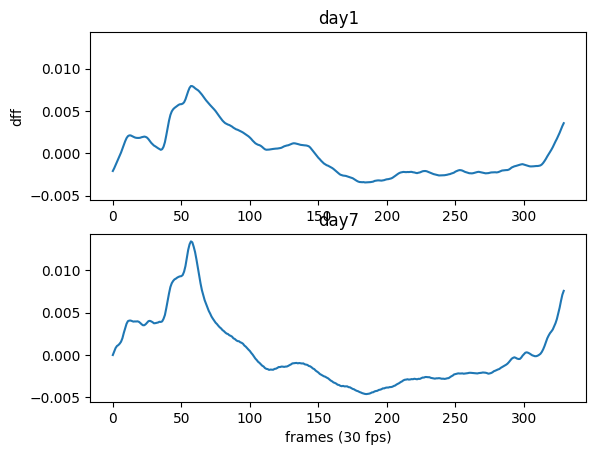

In [29]:
fig, axs = plt.subplots(2, sharey=True)
# Plot on the first subplot
axs[0].plot(avg_day1_d_v1)
axs[0].set_title('day1')
# Plot on the second subplot
axs[1].plot(avg_day7_d_v1)
axs[1].set_title('day7')
# Set labels for axes
axs[1].set_xlabel('frames (30 fps)')
axs[0].set_ylabel('dff')
# Display the plots
plt.show()

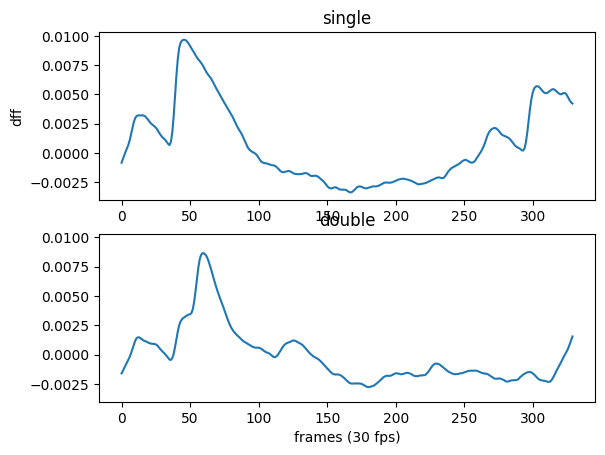

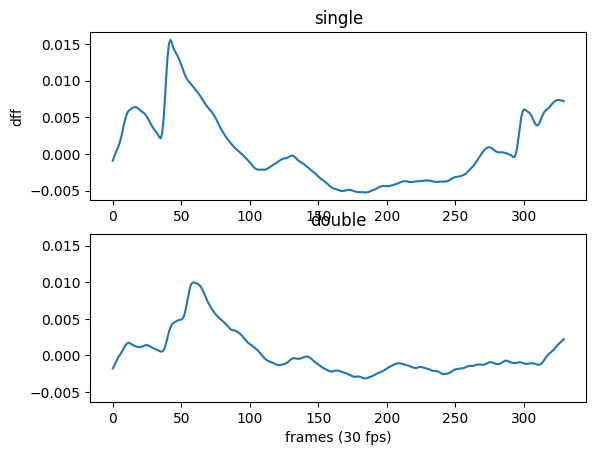

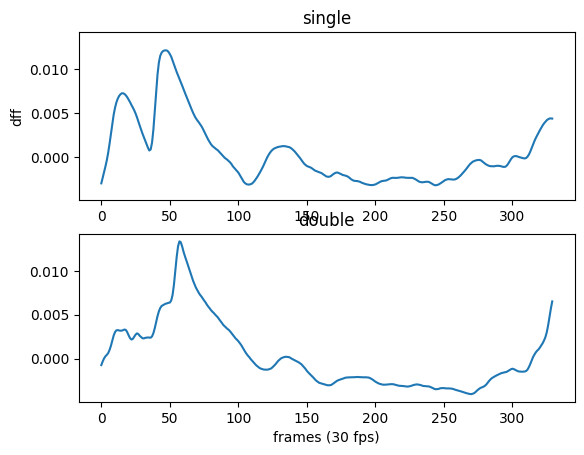

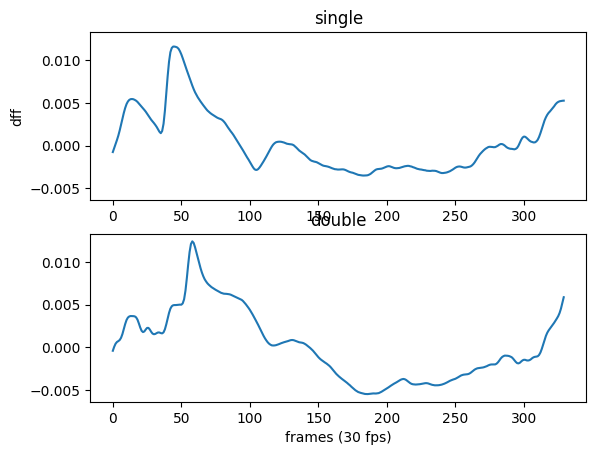

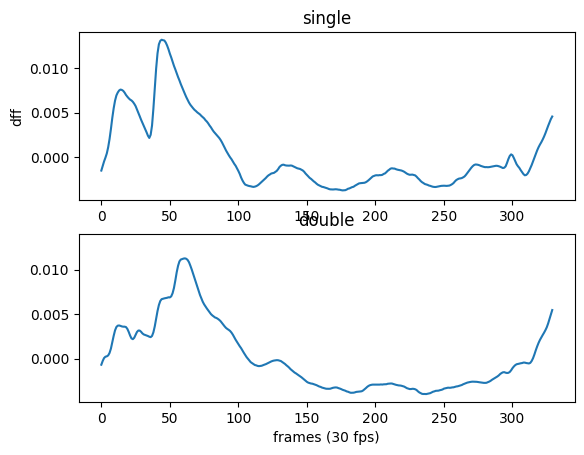

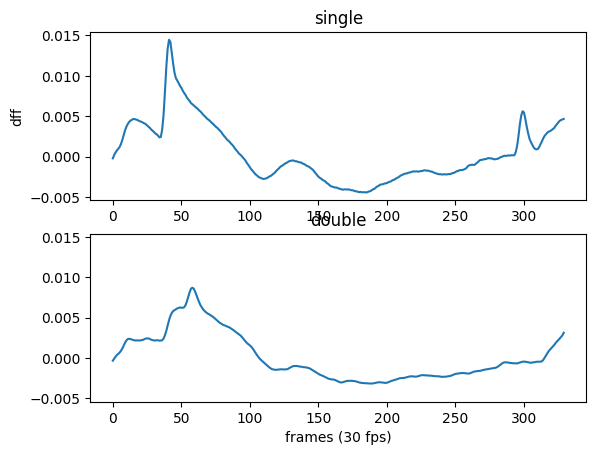

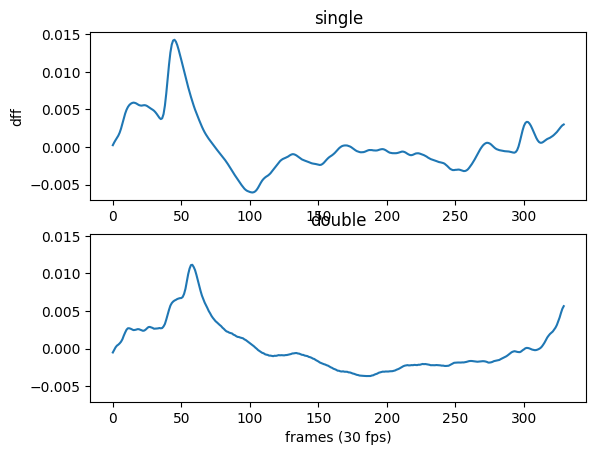

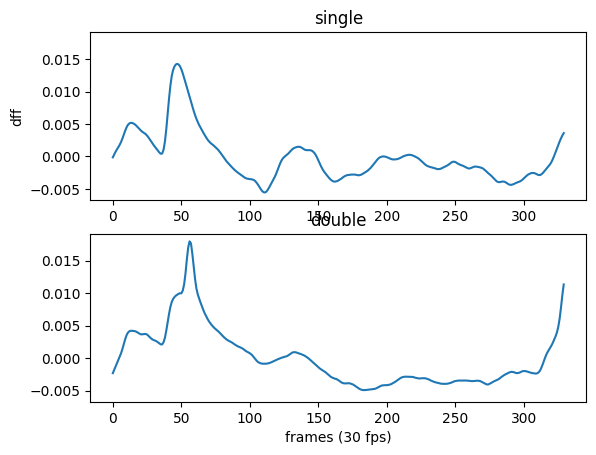

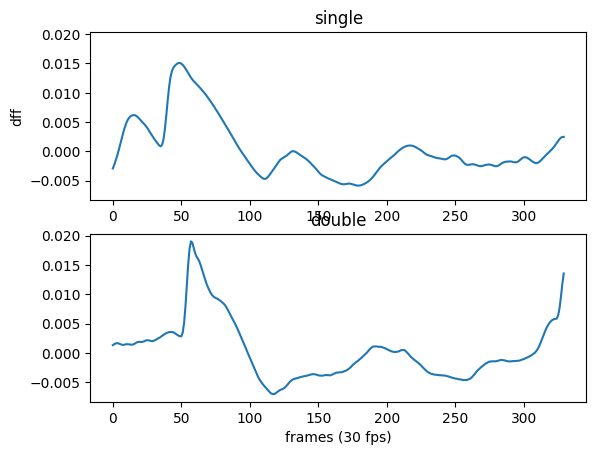

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


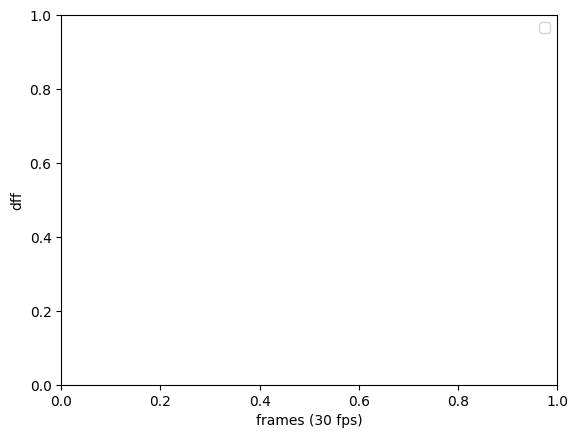

In [19]:
def pickle_from_folder(folder_path):
    # Initialize an empty list to store loaded data
    loaded_data = []

    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is a pickle file
        if filename.endswith('.pickle'):
            file_path = os.path.join(folder_path, filename)
            try:
                # Open the pickle file in read-binary mode
                with open(file_path, 'rb') as file:
                    # Load the data from the pickle file
                    data = pickle.load(file)
                    loaded_data.append(data)
            except Exception as e:
                print(f"Error loading {filename}: {e}")
                
    return loaded_data

def calculate_average_and_plot(folder_path, day_name):
    # Load data for single and double trials
    s_v1_path = os.path.join(folder_path, "single", "v1")
    d_v1_path = os.path.join(folder_path, "double", "v1")

    s_v1_data = pickle_from_folder(s_v1_path)
    d_v1_data = pickle_from_folder(d_v1_path)

    # Calculate mean for single trials
    s_v1_means = [np.mean(data, axis=(1, 2)) for data in s_v1_data]
    avg_s_v1 = np.mean(np.stack(s_v1_means), axis=0)

    d_v1_means = [np.mean(data, axis=(1, 2)) for data in d_v1_data]
    avg_d_v1 = np.mean(np.stack(d_v1_means), axis=0)

    # Plotting

    fig, axs = plt.subplots(2, sharey=True)
    # Plot on the first subplot
    axs[0].plot(avg_s_v1,label=day_name)
    axs[0].set_title('single')
    # Plot on the second subplot
    axs[1].plot(avg_d_v1,label=day_name)
    axs[1].set_title('double')
    # Set labels for axes
    axs[1].set_xlabel('frames (30 fps)')
    axs[0].set_ylabel('dff')
    # Display the plots
    plt.show()
    plt.plot(avg_s_v1, label=day_name)
    plt.plot(avg_d_v1, label=day_name)


# Define the shared folder path
shared_path = "X:/Raymond Lab/1_Kai/3_processed_data/2_pickle/stage3"

# Define the list of days
days = ["day1","day2","day3","day4","day5","day6","day7","day8","day9"]  # You can add more days here

# Plotting loop for each day
for day in days:
    folder_path = os.path.join(shared_path, day)
    calculate_average_and_plot(folder_path, day)

# Set labels for axes
plt.xlabel('frames (30 fps)')
plt.ylabel('dff')
plt.legend()
plt.show()


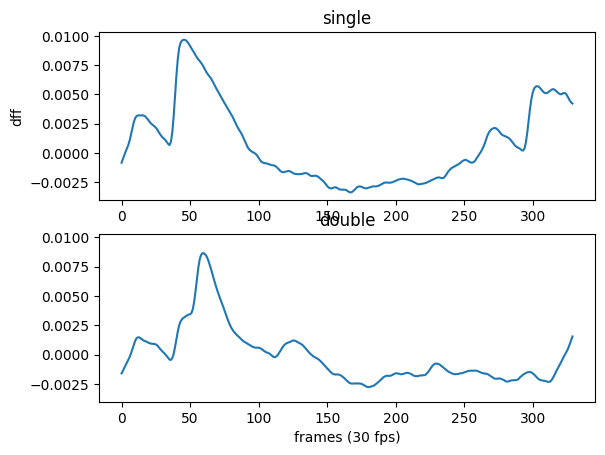

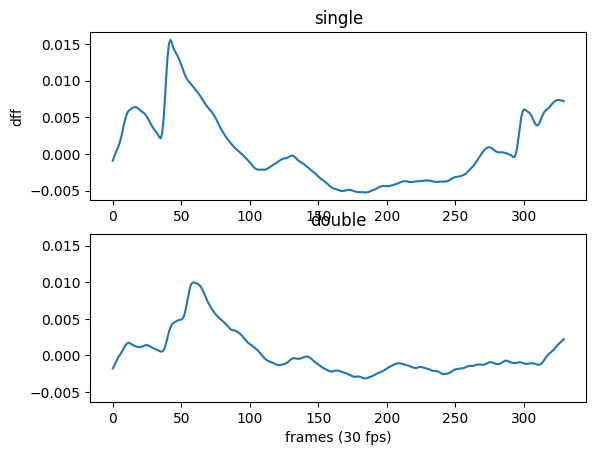

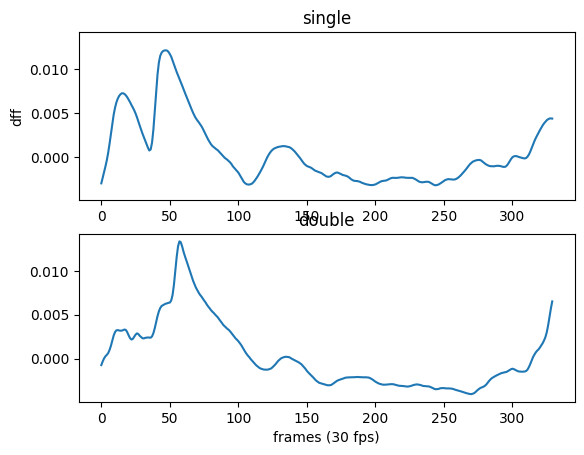

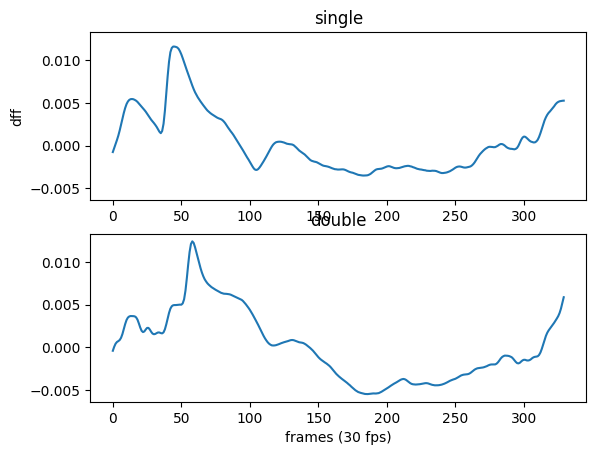

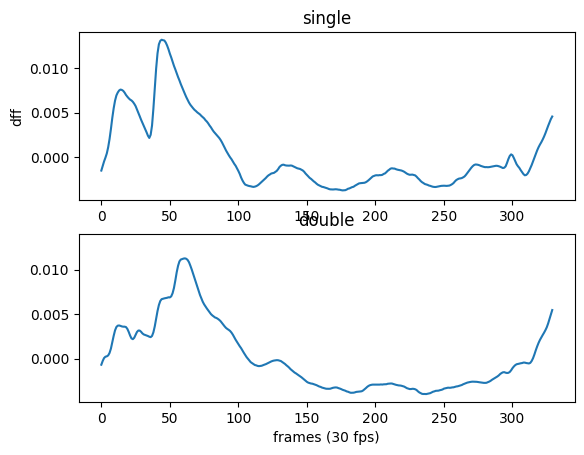

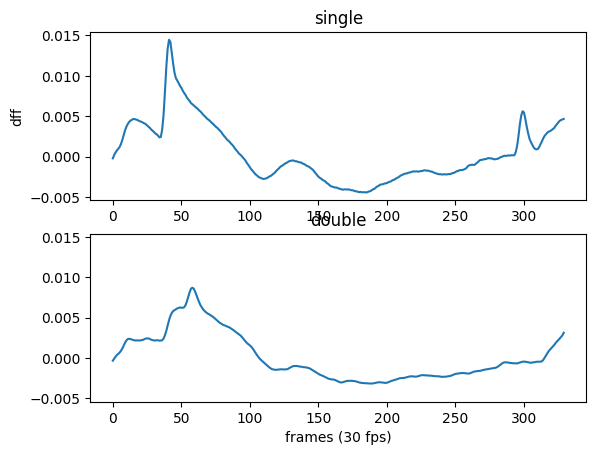

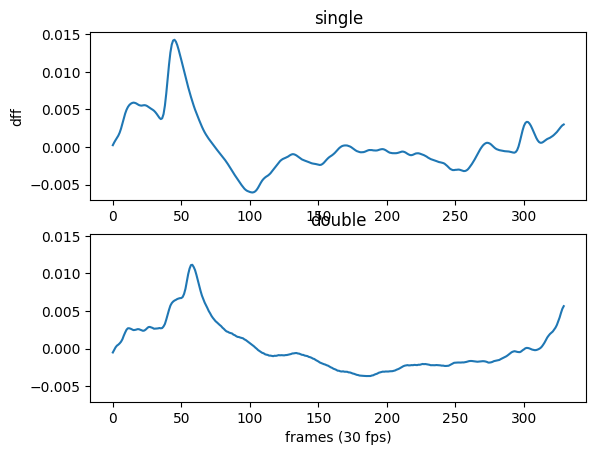

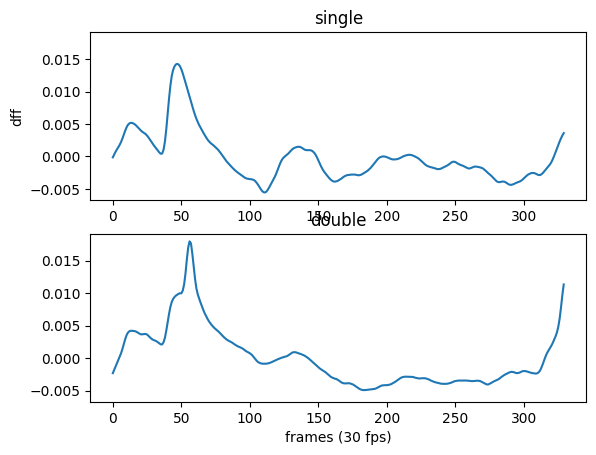

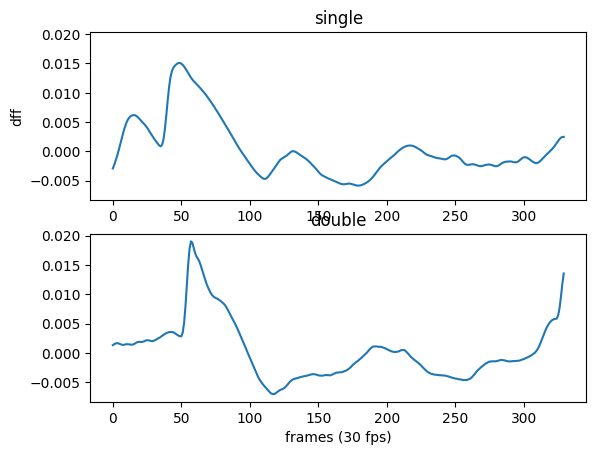

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


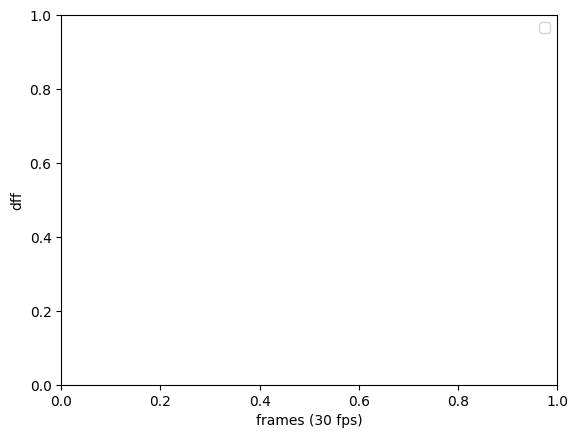

In [19]:
def pickle_from_folder(folder_path):
    # Initialize an empty list to store loaded data
    loaded_data = []

    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is a pickle file
        if filename.endswith('.pickle'):
            file_path = os.path.join(folder_path, filename)
            try:
                # Open the pickle file in read-binary mode
                with open(file_path, 'rb') as file:
                    # Load the data from the pickle file
                    data = pickle.load(file)
                    loaded_data.append(data)
            except Exception as e:
                print(f"Error loading {filename}: {e}")
                
    return loaded_data

def calculate_average_and_plot(folder_path, day_name):
    # Load data for single and double trials
    s_v1_path = os.path.join(folder_path, "single", "v1")
    d_v1_path = os.path.join(folder_path, "double", "v1")

    s_v1_data = pickle_from_folder(s_v1_path)
    d_v1_data = pickle_from_folder(d_v1_path)

    # Calculate mean for single trials
    s_v1_means = [np.mean(data, axis=(1, 2)) for data in s_v1_data]
    avg_s_v1 = np.mean(np.stack(s_v1_means), axis=0)

    d_v1_means = [np.mean(data, axis=(1, 2)) for data in d_v1_data]
    avg_d_v1 = np.mean(np.stack(d_v1_means), axis=0)

    # Plotting

    fig, axs = plt.subplots(2, sharey=True)
    # Plot on the first subplot
    axs[0].plot(avg_s_v1,label=day_name)
    axs[0].set_title('single')
    # Plot on the second subplot
    axs[1].plot(avg_d_v1,label=day_name)
    axs[1].set_title('double')
    # Set labels for axes
    axs[1].set_xlabel('frames (30 fps)')
    axs[0].set_ylabel('dff')
    # Display the plots
    plt.show()
    plt.plot(avg_s_v1, label=day_name)
    plt.plot(avg_d_v1, label=day_name)


# Define the shared folder path
shared_path = "X:/Raymond Lab/1_Kai/3_processed_data/2_pickle/stage3"

# Define the list of days
days = ["day1","day2","day3","day4","day5","day6","day7","day8","day9"]  # You can add more days here

# Plotting loop for each day
for day in days:
    folder_path = os.path.join(shared_path, day)
    calculate_average_and_plot(folder_path, day)

# Set labels for axes
plt.xlabel('frames (30 fps)')
plt.ylabel('dff')
plt.legend()
plt.show()


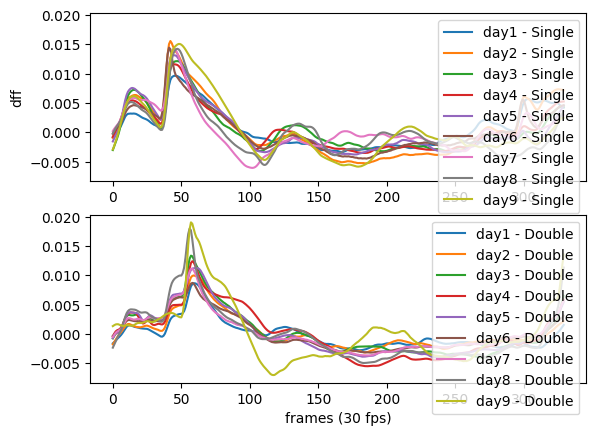

In [23]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

def pickle_from_folder(folder_path):
    # Initialize an empty list to store loaded data
    loaded_data = []

    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is a pickle file
        if filename.endswith('.pickle'):
            file_path = os.path.join(folder_path, filename)
            try:
                # Open the pickle file in read-binary mode
                with open(file_path, 'rb') as file:
                    # Load the data from the pickle file
                    data = pickle.load(file)
                    loaded_data.append(data)
            except Exception as e:
                print(f"Error loading {filename}: {e}")
                
    return loaded_data

def calculate_average(folder_path):
    # Load data for single and double trials
    s_v1_path = os.path.join(folder_path, "single", "v1")
    d_v1_path = os.path.join(folder_path, "double", "v1")

    s_v1_data = pickle_from_folder(s_v1_path)
    d_v1_data = pickle_from_folder(d_v1_path)

    # Calculate mean for single trials
    s_v1_means = [np.mean(data, axis=(1, 2)) for data in s_v1_data]
    avg_s_v1 = np.mean(np.stack(s_v1_means), axis=0)

    # Calculate mean for double trials
    d_v1_means = [np.mean(data, axis=(1, 2)) for data in d_v1_data]
    avg_d_v1 = np.mean(np.stack(d_v1_means), axis=0)

    return avg_s_v1, avg_d_v1

# Define the shared folder path
shared_path = "X:/Raymond Lab/1_Kai/3_processed_data/2_pickle/stage3"

# Define the list of days
days = ["day1","day2","day3","day4","day5","day6","day7","day8","day9"]  # You can add more days here

# Plotting
fig, axs = plt.subplots(2, sharey=True)

for day in days:
    folder_path = os.path.join(shared_path, day)
    avg_s_v1, avg_d_v1 = calculate_average(folder_path)

    # Plot single trials in the first subplot
    axs[0].plot(avg_s_v1, label=f'{day} - Single')

    # Plot double trials in the second subplot
    axs[1].plot(avg_d_v1, label=f'{day} - Double')

# Set labels for axes
axs[1].set_xlabel('frames (30 fps)')
axs[0].set_ylabel('dff')

# Add legends
axs[0].legend()
axs[1].legend()

plt.show()
